In [1]:
#Importamos Librerias
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargamos archivo
df_mexico= pd.read_csv('Mexico_act1.csv') 

In [3]:
#Seleccionamos solo las columnas que utilizaremos para este análisis y crearemos un nuevo dataframe
df_mexico2 = df_mexico.loc[:, ['room_type','price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
df_mexico2

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,850,180,18,0.17,6,325,0
1,Entire home/apt,4056,1,0,NaN,1,363,0
2,Private room,752,1,0,NaN,1,365,0
3,Entire home/apt,971,4,17,0.15,6,203,0
4,Entire home/apt,18000,1,56,0.43,11,347,7
...,...,...,...,...,...,...,...,...
21664,Entire home/apt,673,1,3,2.73,79,355,3
21665,Entire home/apt,897,2,107,1.97,11,314,17
21666,Entire home/apt,230,1,5,0.16,4,140,0
21667,Entire home/apt,690,3,0,NaN,1,354,0


In [4]:
#Detectamos valores nulos
valores_nulos = df_mexico2.isnull().sum()
valores_nulos

room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 3990
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [5]:
#Copia del dataframe
df_mexico3=df_mexico2.copy()
#Realizar valores nulos con promedio 
df_mexico3["reviews_per_month"]=df_mexico3["reviews_per_month"].fillna(round(df_mexico2["reviews_per_month"].mean(),1))
df_mexico3

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,850,180,18,0.17,6,325,0
1,Entire home/apt,4056,1,0,1.60,1,363,0
2,Private room,752,1,0,1.60,1,365,0
3,Entire home/apt,971,4,17,0.15,6,203,0
4,Entire home/apt,18000,1,56,0.43,11,347,7
...,...,...,...,...,...,...,...,...
21664,Entire home/apt,673,1,3,2.73,79,355,3
21665,Entire home/apt,897,2,107,1.97,11,314,17
21666,Entire home/apt,230,1,5,0.16,4,140,0
21667,Entire home/apt,690,3,0,1.60,1,354,0


In [6]:
#Corroboramos que no existan nulos
valores_nulos = df_mexico3.isnull().sum().sum()
valores_nulos

0

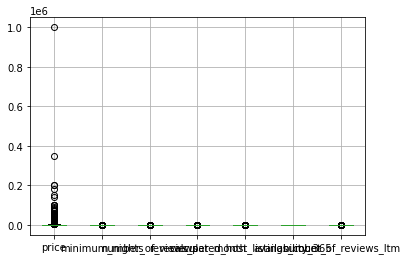

In [7]:
#Graficamos todas las dispersiones entre todas las variables
boxplot = df_mexico3.boxplot(column=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])  

In [8]:
y=df_mexico3
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_10844/1598189736.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Superior= y.mean() + 3*y.std()


Limite superior permitido price                             25905.930891
minimum_nights                       85.281758
number_of_reviews                   199.831653
reviews_per_month                     7.048518
calculated_host_listings_count       77.374844
availability_365                    611.763575
number_of_reviews_ltm                73.472263
dtype: float64
Limite inferior permitido price                            -23005.020281
minimum_nights                      -75.599170
number_of_reviews                  -136.638613
reviews_per_month                    -3.871309
calculated_host_listings_count      -57.479417
availability_365                   -124.957262
number_of_reviews_ltm               -50.588050
dtype: float64


/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_10844/1598189736.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Inferior= y.mean() - 3*y.std()


In [9]:
#Encontramos Ouliers del Dataframe
outliers= df_mexico3[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_10844/3855384731.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= df_mexico3[(y>Limite_Superior)|(y<Limite_Inferior)]


,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21664,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN
21665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
mexico_clean=df_mexico3.copy()
mexico_clean=mexico_clean.fillna(round(df_mexico3.mean(),1))
mexico_clean

/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_10844/2531049339.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mexico_clean=mexico_clean.fillna(round(df_mexico3.mean(),1))


,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,850,180,18,0.17,6,325,0
1,Entire home/apt,4056,1,0,1.60,1,363,0
2,Private room,752,1,0,1.60,1,365,0
3,Entire home/apt,971,4,17,0.15,6,203,0
4,Entire home/apt,18000,1,56,0.43,11,347,7
...,...,...,...,...,...,...,...,...
21664,Entire home/apt,673,1,3,2.73,79,355,3
21665,Entire home/apt,897,2,107,1.97,11,314,17
21666,Entire home/apt,230,1,5,0.16,4,140,0
21667,Entire home/apt,690,3,0,1.60,1,354,0


In [11]:
#Obtenemos el archivo limpio
mexico_clean.to_csv("mexico_clean.csv")